# Problem 2

In [3]:
# Required Python packages
import numpy as np
import cvxpy as cp
import os
import matplotlib.pyplot as plt
import time as t

# Load data

x = np.load('data/p2x.npy')
y = np.load('data/p2y.npy')

rho = 1   # regularization parameter
delta = 0.1 # Huber loss parameter

# +-----------------+
# | Your Code Here! |
# +-----------------+

#Problem 2 implementation
m = x.shape[0]
n = x.shape[1]

#Define Variable
t = cp.Variable((m,1))
r_p = cp.Variable((m,1), nonneg=True)
r_n = cp.Variable((m,1), nonneg=True)
w = cp.Variable(1)
b = cp.Variable(1)
obj = cp.Variable(1)

constraints = [ 
    w*x + cp.reshape(b * np.ones(m),(m,1)) - cp.reshape(y,(m,1)) - t <= r_p,
    cp.reshape(y,(m,1)) - w*x - cp.reshape(b * np.ones(m),(m,1)) + t <= r_n,
    1/2 * cp.norm2(t) + delta * np.ones(m).T*(r_p + r_n) + rho/2 * cp.norm2(w) <= obj
    ]

#Define Objective
objective = cp.Minimize(obj)
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.MOSEK, verbose=True)

y_predict = w.value*x + (b.value * np.ones(m)).reshape((m,1))


                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) Nov 17 03:37:26 PM: Your problem has 129 variables, 3 constraints, and 0 parameters.
(CVXPY) Nov 17 03:37:26 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 17 03:37:26 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 17 03:37:26 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 17 03:37:26 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 17 03:37:26 PM: Compiling problem (target solver=MOSEK).
(C

c:\Users\jingwang\.conda\envs\convex\lib\site-packages\cvxpy\expressions\expression.py:621: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Nov 17 03:37:26 PM: Factor     - dense dim.             : 0                 flops                  : 2.38e+05        
(CVXPY) Nov 17 03:37:26 PM: ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
(CVXPY) Nov 17 03:37:26 PM: 0   1.6e+02  5.9e+00  1.5e+00  0.00e+00   0.000000000e+00   5.000000000e-01   1.0e+00  0.01  
(CVXPY) Nov 17 03:37:26 PM: 1   1.9e+01  7.2e-01  4.7e-01  -9.65e-01  3.508490085e+00   -1.905865801e+00  1.2e-01  0.05  
(CVXPY) Nov 17 03:37:26 PM: 2   5.6e+00  2.1e-01  1.9e-01  -6.63e-01  2.530726795e+01   1.365369982e+01   3.5e-02  0.05  
(CVXPY) Nov 17 03:37:26 PM: 3   3.8e-02  1.4e-03  8.9e-04  -1.58e-01  1.705706616e+01   1.072274165e+01   2.4e-04  0.06  
(CVXPY) Nov 17 03:37:26 PM: 4   1.7e-03  6.5e-05  8.9e-06  9.90e-01   1.781192288e+01   1.751819261e+01   1.1e-05  0.06  
(CVXPY) Nov 17 03:37:26 PM: 5   1.1e-04  4.1e-06  1.1e-07  9.99e-01   1.811444129e+01   1.810372632e+01   6.8e-07  0.06  
(CVXPY) Nov 17 03:37

[4.49178922]
[0.6240286]


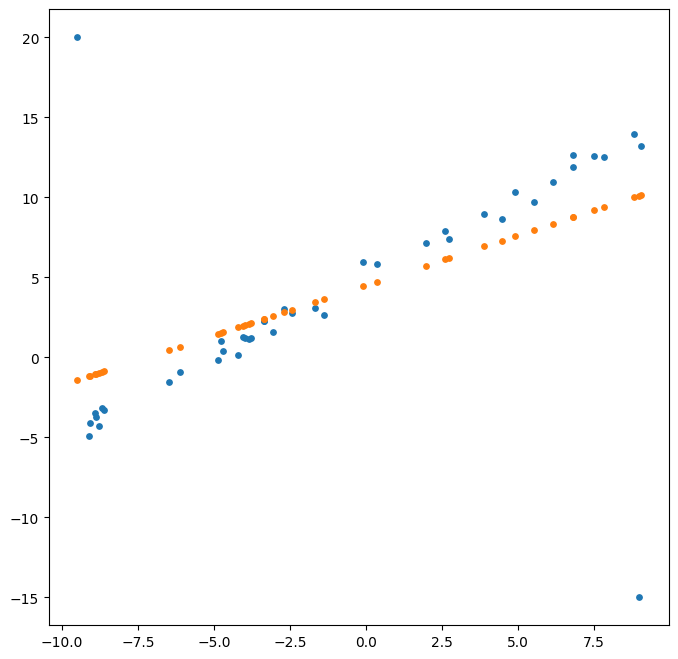

In [4]:
print(b.value)
print(w.value)
plt.figure(figsize=(8,8))
plt.scatter([xi for xi in x],[yi for yi in y], s=15, c = "#1f77b4")
plt.scatter([xi for xi in x],[yi for yi in y_predict], s=15, c = "#ff7f0e")


In [1]:
# Required Python packages
import numpy as np
import cvxpy as cp
import os
import matplotlib.pyplot as plt
import time as t

# Load data

x = np.load('data/p2x.npy')
y = np.load('data/p2y.npy')

rho = 1   # regularization parameter
delta = 1 # Huber loss parameter

# +-----------------+
# | Your Code Here! |
# +-----------------+

#Problem 2 implementation
m = x.shape[0]
n = x.shape[1]

#Define Variable
t = cp.Variable((m,1))
r_p = cp.Variable((m,1), nonneg=True)
r_n = cp.Variable((m,1), nonneg=True)
w = cp.Variable(1)
b = cp.Variable(1)
obj = cp.Variable(1)

constraints = [ 
#    w*x + cp.reshape(b * np.ones(m),(m,1)) - cp.reshape(y,(m,1)) - t <= r_p,
#    cp.reshape(y,(m,1)) - w*x - cp.reshape(b * np.ones(m),(m,1)) + t <= r_n,
    1/2 * cp.norm2(w*x+cp.reshape(b * np.ones(m),(m,1)) - cp.reshape(y,(m,1))) +  rho/2 * cp.norm2(w) <= obj
    ]

#Define Objective
objective = cp.Minimize(obj)
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.MOSEK, verbose=True)

y_predict = w.value*x + (b.value * np.ones(m)).reshape((m,1))

                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) Nov 17 03:25:30 PM: Your problem has 3 variables, 1 constraints, and 0 parameters.
(CVXPY) Nov 17 03:25:30 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 17 03:25:30 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 17 03:25:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 17 03:25:30 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 17 03:25:30 PM: Compiling problem (target solver=MOSEK).
(CVX

[4.49181582]
[0.624052]


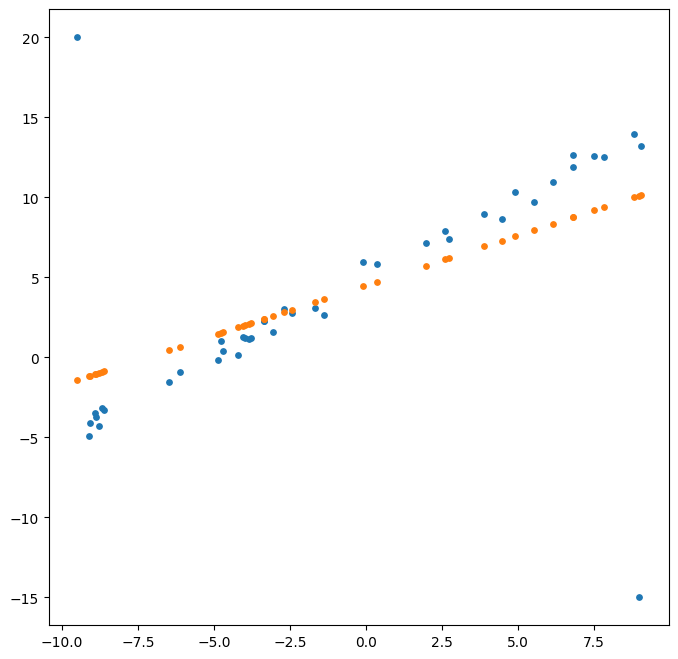

In [2]:
print(b.value)
print(w.value)
plt.figure(figsize=(8,8))
plt.scatter([xi for xi in x],[yi for yi in y], s=15, c = "#1f77b4")
plt.scatter([xi for xi in x],[yi for yi in y_predict], s=15, c = "#ff7f0e")